In [2]:
import matplotlib.pyplot as plt
from math import cos, sin, pi
import numpy as np
import matplotlib.patches as patches

AttributeError: 'module' object has no attribute 'set_xlabel'

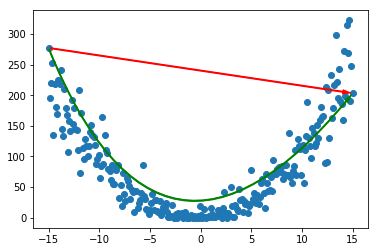

In [3]:
x = []
y = []
num_points = 250
plt.clf()

for x_val in np.linspace(-15,15,num=num_points):
    x_rand = np.random.normal(x_val, 1.5, 1)
    y_val=x_rand*x_rand+x_rand

    x.append(x_val)
    y.append(y_val)

plt.scatter(x,y)  
style="Simple,tail_width=1,head_width=4,head_length=8"
kw_red = dict(arrowstyle=style, color="r")
kw_green = dict(arrowstyle=style, color="g")
a1 = patches.FancyArrowPatch((x[0],y[0]), (x[num_points-1],y[num_points-1]),**kw_red)
a3 = patches.FancyArrowPatch((x[0],y[0]), (x[num_points-1],y[num_points-1]),connectionstyle="arc3,rad=0.85", **kw_green)
plt.gca().add_patch(a1)
plt.gca().add_patch(a3)
plt.set_xlabel("X1")
plt.set_ylabel("X2")

plt.savefig('RandomPoints.png')

plt.show()


<Figure size 432x288 with 0 Axes>

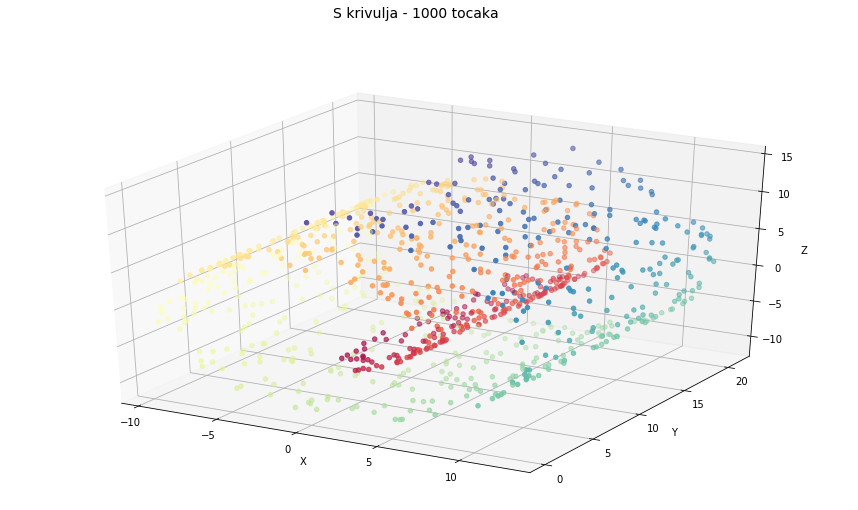

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
plt.clf()

n_points = 1000
X, color = datasets.samples_generator.make_swiss_roll(n_points, random_state=0)
n_neighbors = 10
n_components = 2

np.random.seed(0)


n = 100

fig = plt.figure(figsize=(15, 8))
plt.suptitle("S krivulja - 1000 tocaka"
             , fontsize=14)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()


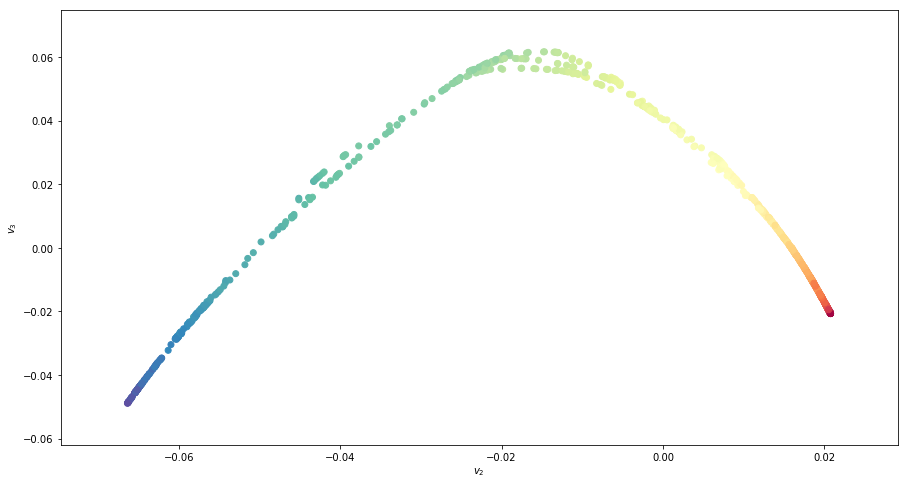

In [7]:
from sklearn import metrics
import numpy as np

def diffusion_map(X, gamma, k):
    K = metrics.pairwise.rbf_kernel(X, gamma=gamma)
    D = np.diagflat(K.sum(axis=1, keepdims=True))
    P = np.matmul(np.linalg.inv(D), K)
    W, V = np.linalg.eig(P)
    return V


fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(111)
V = diffusion_map(X, 0.3, 2)
ax.scatter(V[:, 1], V[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_xlabel("$v_2$")
ax.set_ylabel("$v_3$")
plt.show()


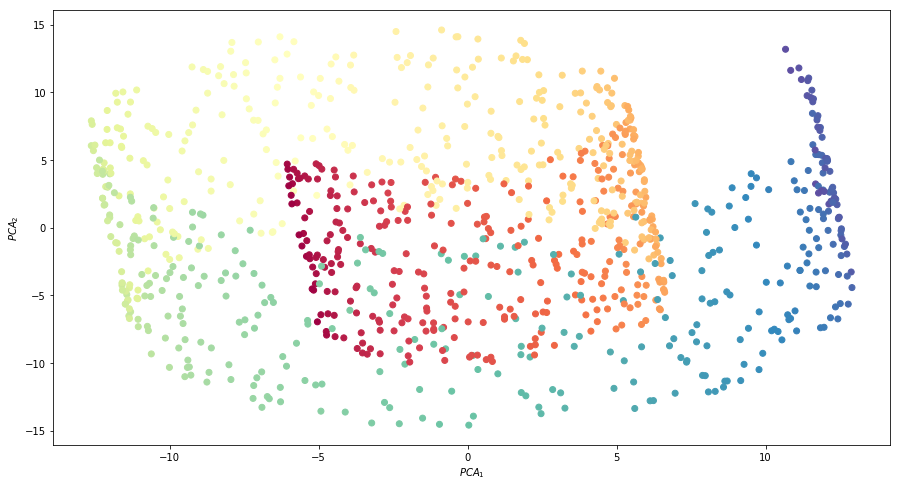

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(X)
transformed_pca = pca.transform(X)

fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(111)
ax.scatter(transformed_pca[:,0], transformed_pca[:,1], c=color, cmap=plt.cm.Spectral)
ax.set_xlabel("$PCA_1$")
ax.set_ylabel("$PCA_2$")
plt.show()

